<center><h1 style="font-family:verdana;"><strong>Voucher dengan Nilai Lebih Tinggi akan Menarik User untuk Bertransaksi Lebih Banyak?</strong></h1></center>
<center><h2><strong><font color="red">Nanda Anzana</font></strong></h2></center>
<img alt="" src="images/blog-banner-01.jpg" style="width: 1000px"/>

<h1><strong>Latar Belakang</strong></h1>

<p1>Ketika menjalankan promosi, setiap organisasi harus memastikan ada keseimbangan antara nilai promosi yang dikeluarkan dengan goal yang diharapkan. Membakar sebanyak mungkin uang mungkin akan menarik banyak user, tapi apakah user-user tersebut akan kembali tanpa promosi?
Dalam case study ini, saya ditugaskan untuk melakukan analisis dari hasil pilot testing dari dua promosi yang telah dilakukan. Dalam skema pertama, satu user group diberikan voucher senilai 10K dan grup yang lain diberikan voucher 25K. Tujuan dari analisis ini adalah untuk mengetahui jawaban dari pertanyaan ini:
</p1>

<center><h2><strong><font color="red">Jumlah promosi mana yang akan menarik user untuk bertransaksi lebih banyak?</font></strong></h2></center>



<center><h3><strong><font color="blue">Pre-Processing</font></strong></h3></center>



<p1>Pertama akan di-import semua package yang diperlukan.</p1>



In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scs
import statsmodels.stats.api as sms

C:\Users\Nanda Anzana\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<p1>Membaca data berdasarkan dataset yang diberikan, dan melihat lima data teratas.</p1>

In [2]:
data = pd.read_csv("preliminary_dataset.csv",sep=",",converters={'Unnamed: 0':str, 'user_id':str, 'merchant_id':str})
data.head()

,Unnamed: 0,user_id,merchant_id,coupon_value,three_trx,five_trx
0,0,384212,817754,25000.0,0.0,0.0
1,1,521382,571603,25000.0,0.0,0.0
2,2,492364,841900,25000.0,0.0,0.0
3,3,565771,074426,25000.0,0.0,0.0
4,4,636203,404793,25000.0,0.0,0.0


<p1>Karena kolom unnamed tidak mengandung informasi apapun, maka kolom tersebut akan dihapus.</p1>

In [3]:
data.drop(columns='Unnamed: 0',inplace=True)
data.head()

,user_id,merchant_id,coupon_value,three_trx,five_trx
0,384212,817754,25000.0,0.0,0.0
1,521382,571603,25000.0,0.0,0.0
2,492364,841900,25000.0,0.0,0.0
3,565771,074426,25000.0,0.0,0.0
4,636203,404793,25000.0,0.0,0.0


<p1>Selanjutnya akan dilihat informasi terkait data yang ada. Dapat dilihat di bawah bahwa terdapat 3 nilai kosong pada data. Sebelum melakukan manipulasi terhadap data. Akan dilihat terlebih dahulu bagaimana bentuk data yang kosong.</p1>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 5 columns):
user_id         8176 non-null object
merchant_id     8176 non-null object
coupon_value    8173 non-null float64
three_trx       8173 non-null float64
five_trx        8173 non-null float64
dtypes: float64(3), object(2)
memory usage: 319.5+ KB


In [5]:
df1 = data[data.isna().any(axis=1)]
df1.head()

,user_id,merchant_id,coupon_value,three_trx,five_trx
220,,,NaN,NaN,NaN
407,,,NaN,NaN,NaN
1016,,,NaN,NaN,NaN


<p1>Ternyata keseluruhan kolom berisi data kosong, sehingga bisa langsung dihilangkan saja.</p1>

In [6]:
data.drop([220,407,1016],axis=0,inplace=True)

<p1>Akan dilihat apakah banyak user sama dengan banyaknya data.</p1>

In [7]:
len(data.user_id.unique())

8147

<p1>Ternyata banyaknya user id hanya 8147, lebih sedikit daripada keseluruhan data yang berjumlah 8173. Ada 2 kemungkinan:</p1>

<ul><li>Ada data berganda yang memuat user_id, merchant_id, dan coupon_value yang sama.</li>
    <li>User_id yang sama membeli di merchant yang berbeda, sehingga user_id dicatatkan lebih dari satu kali.</li></ul>
    
<p1><strong>Pertama-tama</strong> dilihat terlebih dahulu user mana saja dicatatkan lebih dari 2 kali.</p1>

In [8]:
user_ganda = []
user = list(data.user_id.values)
unik = list(data.user_id.unique())
for i in unik:
    k = user.count(i)
    if k>1:
        user_ganda.append(i)

<p1>Lalu dilihat user mana saja yang memiliki user dan merchant sama, tapi memiliki three_trx dan five_trx berbeda.</p1>

In [9]:
for i in user_ganda:
    df2 = data[data.loc[:,'user_id']==i]
    k = list(df2.merchant_id.values)
    for a in k:
        f = k.count(a)
        if f>1:
            print(i)
            print(a)

071860
403849
071860
403849


<p1>Lalu dilihat bagaimana data dengan user id 071860. Berikut adalah datanya.</p1>

In [10]:
data[data.loc[:,'user_id']=="071860"]

,user_id,merchant_id,coupon_value,three_trx,five_trx
1611,071860,403849,25000.0,1.0,1.0
3316,071860,403849,25000.0,0.0,0.0


<p1>Dapat dilihat berdasarkan data di atas bahwa data seperti tercatat dua kali dengan keadaan pembelian yang berbeda. Dalam analisis kali ini dipilih satu catatan, yaitu ketika user dengan id<strong> 071860</strong> melakukan 3 dan 5 transaksi. Data dengan index <strong>3316</strong> akan <strong>dihapus</strong> dengan asumsi bahwa data dengan three_trx dan five_trx sama dengan nol adalah sebuah kesalahan input.</p1>

In [11]:
data.drop([3316],axis=0,inplace=True)

<p1>Dicek kembali banyaknya data.</p1>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8172 entries, 0 to 8175
Data columns (total 5 columns):
user_id         8172 non-null object
merchant_id     8172 non-null object
coupon_value    8172 non-null float64
three_trx       8172 non-null float64
five_trx        8172 non-null float64
dtypes: float64(3), object(2)
memory usage: 383.1+ KB


<p1>Kolom three_trx dan five_trx seharusnya berhubungan. Karena jika user melakukan pembelian 5 kali semenjak diberikan voucher, otomatis juga kolom pembelian 3 kali juga memiliki nilai. Lalu akan dicari semua user yang memiliki 5 transaksi tapi tidak memiliki 3 transaksi.</p1>

In [13]:
data.reset_index(inplace=True)

In [14]:
for i in range (0,len(data)):
    a = data.loc[i,'three_trx']
    b = data.loc[i,'five_trx']
    if a!=b:
        if a==0:
            print(i)

2147
3821
5549
5747


In [15]:
data.loc[[2147,3821,5549,5747],:]

,index,user_id,merchant_id,coupon_value,three_trx,five_trx
2147,2150,273910,324950,25000.0,0.0,1.0
3821,3825,027843,074426,25000.0,0.0,1.0
5549,5553,794336,666703,10000.0,0.0,1.0
5747,5751,739532,404793,10000.0,0.0,1.0


<p1>Dapat terlihat bahwa terdapat data yang membingungkan. Dimana user mencatatkan 5 transaksi, tapi tidak 3 transaksi. Agar mempunyai landasan yang kuat, akan diasumsikan bahwa data ini hanyalah kesalahan input. Jadi angka 0 pada kolom three_trx akan diganti menjadi satu.</p1>

In [16]:
index_asumsi = [2147,3821,5549,5747]
for i in index_asumsi:
    data.loc[i,'three_trx']=1
data.loc[[2147,3821,5549,5747],:]

,index,user_id,merchant_id,coupon_value,three_trx,five_trx
2147,2150,273910,324950,25000.0,1.0,1.0
3821,3825,027843,074426,25000.0,1.0,1.0
5549,5553,794336,666703,10000.0,1.0,1.0
5747,5751,739532,404793,10000.0,1.0,1.0


<p1>Setelah selesai mengganti semua data yang membingungkan, selanjutnya kolom-kolom yang tidak akan dipakai dalam analisis akan dihilangkan, seperti user id, dan index.</p1>

In [17]:
data.drop(columns=["user_id","index"],inplace=True)

In [18]:
data.head()

,merchant_id,coupon_value,three_trx,five_trx
0,817754,25000.0,0.0,0.0
1,571603,25000.0,0.0,0.0
2,841900,25000.0,0.0,0.0
3,074426,25000.0,0.0,0.0
4,404793,25000.0,0.0,0.0


In [19]:
for i in range (0,len(data)):
    if data.loc[i,'coupon_value']==25000:
        data.loc[i,'coupon_value']="25k"
    else:
        data.loc[i,'coupon_value']="10k"

In [20]:
data.head()

,merchant_id,coupon_value,three_trx,five_trx
0,817754,25k,0.0,0.0
1,571603,25k,0.0,0.0
2,841900,25k,0.0,0.0
3,074426,25k,0.0,0.0
4,404793,25k,0.0,0.0


<center><h3><strong><font color="blue">Analisis</font></strong></h3></center>

<p1>Pertama-tama akan dilihat statistik deskriptif dari data</p1>

In [21]:
data.describe(include='all')

,merchant_id,coupon_value,three_trx,five_trx
count,8172,8172,8172.000000,8172.000000
unique,50,2,NaN,NaN
top,404793,25k,NaN,NaN
freq,1191,4194,NaN,NaN
mean,NaN,NaN,0.032917,0.005262
std,NaN,NaN,0.178431,0.072352
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000


<p1>Lalu diberikan visualisasi hubungan merchant id dan banyaknya user dengan 3 lalu 5 transaksi.</p1>

In [22]:
data_visual = data[data.loc[:,'coupon_value']=="10k"]
data_visual = data_visual.groupby("merchant_id").agg({'three_trx':'sum','five_trx':'sum'})
data_visual.columns = ['three_trx_10k', 'five_trx_10k']

data_visual2 = data[data.loc[:,'coupon_value']=="25k"]
data_visual2 = data_visual2.groupby("merchant_id").agg({'three_trx':'sum','five_trx':'sum'})
data_visual2.columns = ['three_trx_25k', 'five_trx_25k']

result =  pd.concat([data_visual, data_visual2], axis=1)
result.replace(np.nan,0, inplace=True)
result.head()

C:\Users\Nanda Anzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,three_trx_10k,five_trx_10k,three_trx_25k,five_trx_25k
002940,4.0,0.0,9.0,1.0
016153,3.0,0.0,3.0,1.0
074426,2.0,1.0,12.0,1.0
105870,0.0,0.0,1.0,0.0
124542,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Frekuensi')

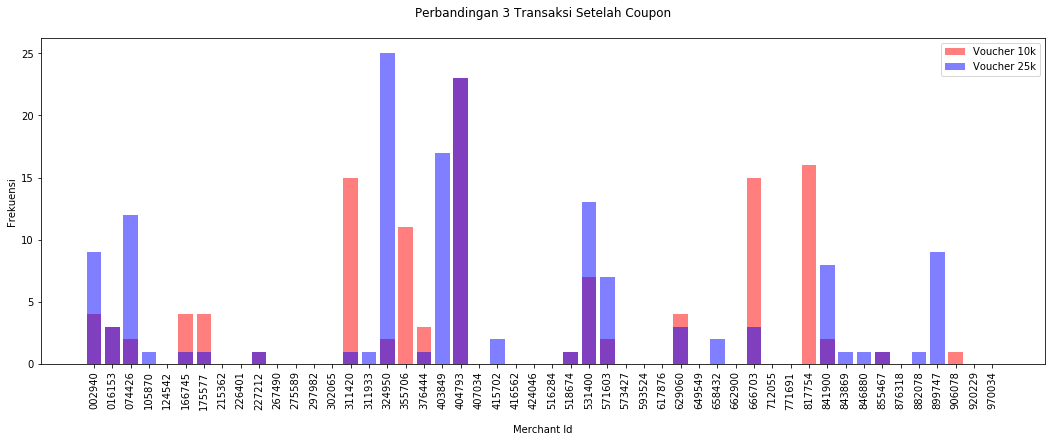

In [23]:
fig, ax = plt.subplots(figsize=(18,6))
x10k = result.index
y10k = result.three_trx_10k.values
ax.bar(x10k, y10k, alpha=0.5,color='red',label='Voucher 10k')
x25k = result.index
y25k = result.three_trx_25k.values
ax.bar(x25k, y25k, alpha=0.5,color='blue',label='Voucher 25k')
plt.legend()
plt.title("Perbandingan 3 Transaksi Setelah Coupon\n")
plt.xticks(x10k,rotation=90)
plt.xlabel('\nMerchant Id')
plt.ylabel('Frekuensi')

<p1>Bisa dilihat bahwa terdapat banyak grafik batang dengan perpanjangan berwarna biru. Berarti terdapat <strong>banyak merchant yang mempunyai kenaikan penjualan sebanyak 3 transaksi setelah pembeli diberikan voucher sebesar 25k</strong>. Lalu dilihat bagaimana dengan 5 transaksi.</p1>

Text(0, 0.5, 'Frekuensi')

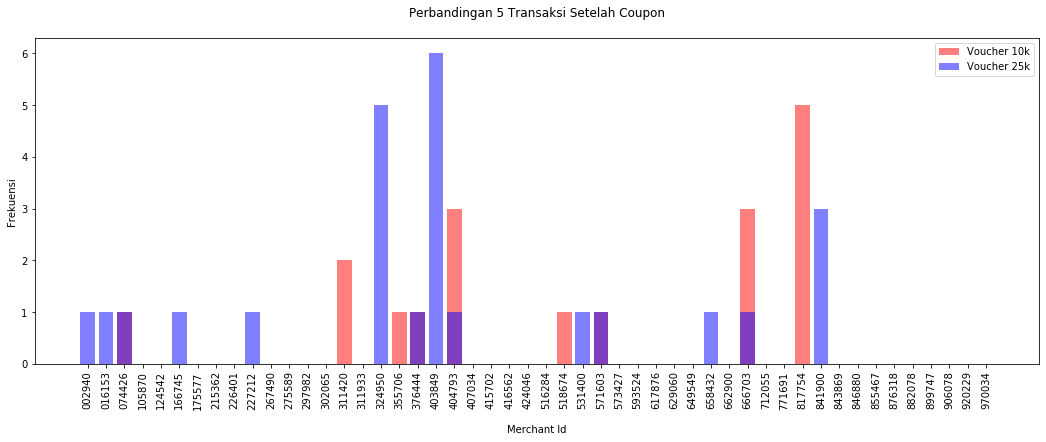

In [24]:
fig, ax = plt.subplots(figsize=(18,6))
x10k = result.index
y10k = result.five_trx_10k.values
ax.bar(x10k, y10k, alpha=0.5,color='red',label='Voucher 10k')
x25k = result.index
y25k = result.five_trx_25k.values
ax.bar(x25k, y25k, alpha=0.5,color='blue',label='Voucher 25k')
plt.legend()
plt.title("Perbandingan 5 Transaksi Setelah Coupon\n")
plt.xticks(x10k,rotation=90)
plt.xlabel('\nMerchant Id')
plt.ylabel('Frekuensi')

<p1>Bisa dilihat bahwa terdapat banyak grafik batang dengan perpanjangan berwarna biru. Berarti terdapat <strong>banyak merchant yang mempunyai kenaikan penjualan sebanyak 5 transaksi setelah pembeli diberikan voucher sebesar 25k</strong>.</p1>

<p1>Lalu dibuat sebuah data baru yang mengandung informasi seberapa banyak voucher yang diberikan, banyaknya transaksi 3 dan 5 di setiap besaran kupon, dan rata-rata transaksinya. Dalam analisis untuk data ini, dilakukan dengan menggunakan <strong>A/B Testing</strong> dengan <strong>voucher sebesar 10k sebagai kontrol</strong> dan <strong>voucher 25k sebagai test</strong>. Lalu dilakukan analisa mengenai dampak terhadap perusahaan.</p1>

In [25]:
test_summary = data.groupby("coupon_value").agg({'three_trx':'sum'})
test_summary['total'] = data.pivot_table(values='three_trx', index='coupon_value', aggfunc=lambda x: len(x))
test_summary['rate'] = data.pivot_table(values='three_trx', index='coupon_value')

test_summary #berisi data 3 transaksi

,three_trx,total,rate
coupon_value,,,
10k,121.0,3978.0,0.030417
25k,148.0,4194.0,0.035289


In [26]:
test_summary2 = data.groupby("coupon_value").agg({'five_trx':'sum'})
test_summary2['total'] = data.pivot_table(values='five_trx', index='coupon_value', aggfunc=lambda x: len(x))
test_summary2['rate'] = data.pivot_table(values='five_trx', index='coupon_value')

test_summary2 #berisi data 5 transaksi

,five_trx,total,rate
coupon_value,,,
10k,18.0,3978.0,0.004525
25k,25.0,4194.0,0.005961


<p1>Dapat terlihat bahwa <strong>terdapat kenaikan</strong> rata-rata pembelian ketika diberikan voucher 25k. Baik dalam 3 transaksi maupun 5 transaksi. Tapi informasi ini masih belum cukup dalam menentukan apakah voucher 25k lebih baik dalam kegiatan promosi atau tidak.</p1>

Text(0, 0.5, 'Probabilitas')

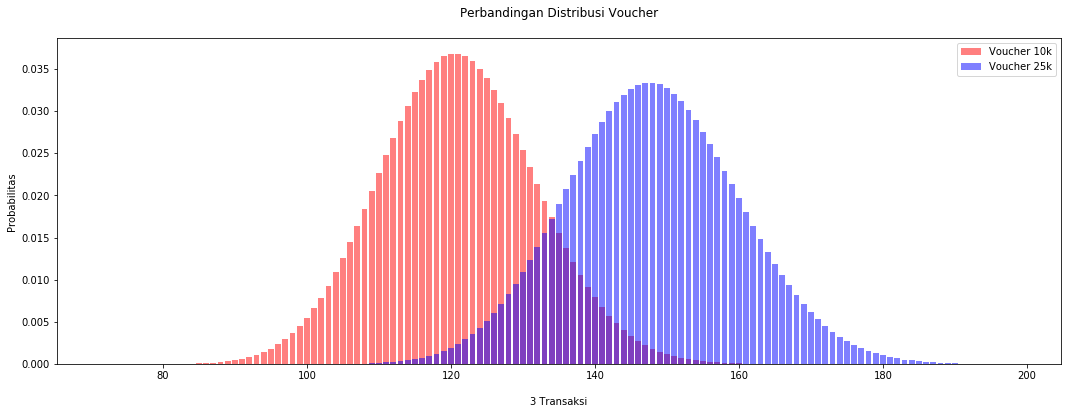

In [27]:
fig, ax = plt.subplots(figsize=(18,6))
x10k = np.linspace(test_summary.loc['10k','three_trx']-49, test_summary.loc['10k','three_trx']+50, 100)
y10k = scs.binom(test_summary.loc['10k','total'], test_summary.loc['10k','rate']).pmf(x10k)
ax.bar(x10k, y10k, alpha=0.5,color='red',label='Voucher 10k')
x25k = np.linspace(test_summary.loc['25k','three_trx']-49, test_summary.loc['25k','three_trx']+50, 100)
y25k = scs.binom(test_summary.loc['25k','total'], test_summary.loc['25k','rate']).pmf(x25k)
ax.bar(x25k, y25k, alpha=0.5,color='blue',label='Voucher 25k')
plt.legend()
plt.title("Perbandingan Distribusi Voucher\n")
plt.xlabel('\n3 Transaksi')
plt.ylabel('Probabilitas')

<p1>Dapat dilihat dari grafik di atas bahwa pembeli yang diberi <strong>voucher 25k</strong> akan cenderung membuat <strong>pembeli yang melakukan transaksi berulang sebanyak 3, meningkat</strong>. Tapi memiliki puncak probabilitas yang lebih kecil.</p1>

In [28]:
tiga_transaksi_10k_dibeli = test_summary.loc['10k','three_trx']
tiga_transaksi_10k_tot = test_summary.loc['10k','total']
tiga_transaksi_10k_rate = test_summary.loc['10k','rate']
p_10k = tiga_transaksi_10k_rate

tiga_transaksi_25k_dibeli = test_summary.loc['25k','three_trx']
tiga_transaksi_25k_tot = test_summary.loc['25k','total']
tiga_transaksi_25k_rate = test_summary.loc['25k','rate']
p_25k = tiga_transaksi_25k_rate

Text(0, 0.5, 'PDF')

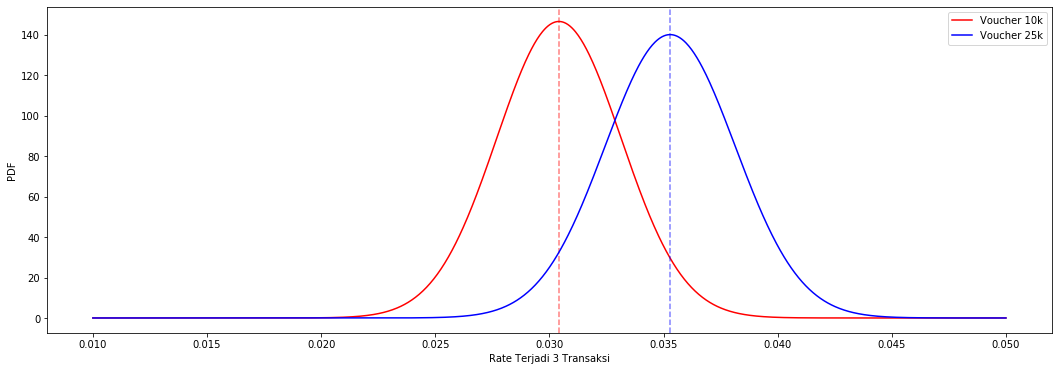

In [29]:
fig, ax = plt.subplots(figsize=(18,6))
SE_10k = np.sqrt(p_10k*(1-p_10k))/np.sqrt(tiga_transaksi_10k_tot)
SE_25k = np.sqrt(p_25k*(1-p_25k))/np.sqrt(tiga_transaksi_25k_tot)

x = np.linspace(.01, .05, 1000)
yA = scs.norm(p_10k, SE_10k).pdf(x)
ax.plot(x, yA, color='red',label='Voucher 10k')
ax.axvline(x=p_10k, c='red', alpha=0.5, linestyle='--')
yB = scs.norm(p_25k, SE_25k).pdf(x)
ax.plot(x, yB, color='blue',label='Voucher 25k')
ax.axvline(x=p_25k, c='blue', alpha=0.5, linestyle='--')

plt.legend()
plt.xlabel('Rate Terjadi 3 Transaksi')
plt.ylabel('PDF')

<p1>Dapat terlihat bahwa mean dari rate terjadinya 3 transaksi pembeli <strong>saat diberikan voucher 25k menjadi lebih besar</strong>. Dengan perbedaan mean voucher 10k dan 25k sebanyak kira-kira <strong>0.005</strong>.

In [30]:
test_10k = data[data.coupon_value=="10k"]
test_25k = data[data.coupon_value=="25k"]

In [31]:
test_summary = data.groupby("coupon_value").agg({'three_trx':'mean'})

test_summary = test_summary.T
test_stats = pd.DataFrame(columns = ['pct_lft','conf_int_lb','conf_int_rb','p-value'])    

test_summary = pd.concat([test_summary,test_stats],axis=1,ignore_index=False,sort=False)

test_summary['pct_lft'] = (test_summary['25k']/test_summary['10k'])-1

for i in test_summary.index:

    cm = sms.CompareMeans(sms.DescrStatsW(test_10k[i]), sms.DescrStatsW(test_25k[i]))

    lb,rb = cm.tconfint_diff(usevar='unequal',alternative='two-sided',alpha = 0.10)    

    test_summary.at[i,'conf_int_lb'] = (rb*-1)/test_10k[i].mean()
    test_summary.at[i,'conf_int_rb'] =  (lb*-1)/test_10k[i].mean()    

    t_stat,test_summary.at[i,'p-value'] = scs.ttest_ind(test_10k[i], test_25k[i],equal_var = False)

In [32]:
test_summary

,10k,25k,pct_lft,conf_int_lb,conf_int_rb,p-value
three_trx,0.030417,0.035289,0.160146,-0.0530148,0.373307,0.216529


<p1>Dapat dilihat bahwa terdapat <strong>kenaikan sebesar 16%</strong> penjualan sebanyak 3 transaksi setelah diberi voucher 25k dengan tingkat keyakinan <strong>78% bahwa ini bukan merupakan suatu kejadian random</strong>. Lalu selanjutnya dilihat perubahan penjualan 5 transaksi.</p1>

Text(0, 0.5, 'Probabilitas')

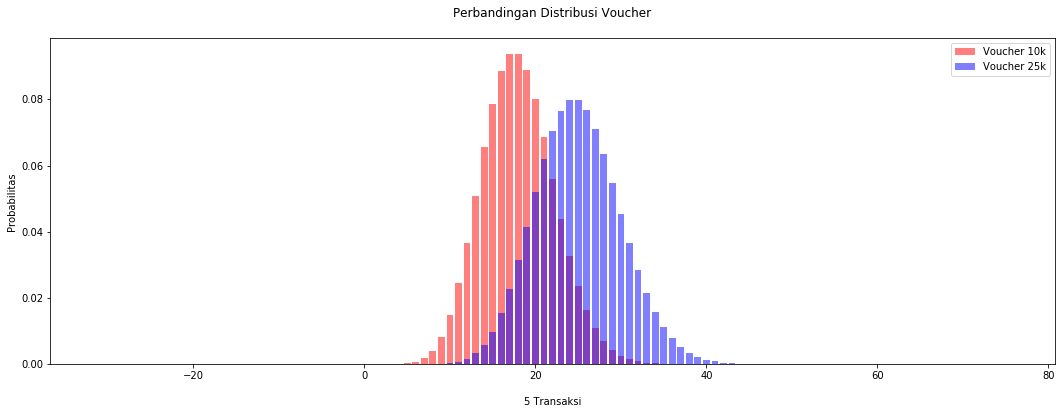

In [33]:
fig, ax = plt.subplots(figsize=(18,6))
x10k = np.linspace(test_summary2.loc['10k','five_trx']-49, test_summary2.loc['10k','five_trx']+50, 100)
y10k = scs.binom(test_summary2.loc['10k','total'], test_summary2.loc['10k','rate']).pmf(x10k)
ax.bar(x10k, y10k, alpha=0.5,color='red',label='Voucher 10k')
x25k = np.linspace(test_summary2.loc['25k','five_trx']-49, test_summary2.loc['25k','five_trx']+50, 100)
y25k = scs.binom(test_summary2.loc['25k','total'], test_summary2.loc['25k','rate']).pmf(x25k)
ax.bar(x25k, y25k, alpha=0.5,color='blue',label='Voucher 25k')
plt.legend()
plt.title("Perbandingan Distribusi Voucher\n")
plt.xlabel('\n5 Transaksi')
plt.ylabel('Probabilitas')

<p1>Dapat dilihat dari grafik di atas bahwa pembeli yang diberi <strong>voucher 25k</strong> akan cenderung membuat <strong>pembeli yang melakukan transaksi berulang sebanyak 5, meningkat</strong>. Tapi memiliki puncak probabilitas yang lebih kecil.</p1>

In [34]:
lima_transaksi_10k_dibeli = test_summary2.loc['10k','five_trx']
lima_transaksi_10k_tot = test_summary2.loc['10k','total']
lima_transaksi_10k_rate = test_summary2.loc['10k','rate']
p_10k = lima_transaksi_10k_rate

lima_transaksi_25k_dibeli = test_summary2.loc['25k','five_trx']
lima_transaksi_25k_tot = test_summary2.loc['25k','total']
lima_transaksi_25k_rate = test_summary2.loc['25k','rate']
p_25k = lima_transaksi_25k_rate

Text(0, 0.5, 'PDF')

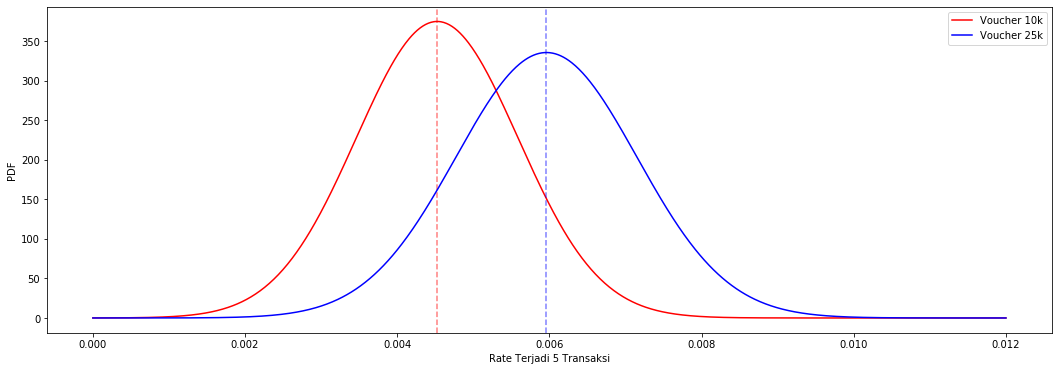

In [35]:
fig, ax = plt.subplots(figsize=(18,6))
SE_10k = np.sqrt(p_10k*(1-p_10k))/np.sqrt(lima_transaksi_10k_tot)
SE_25k = np.sqrt(p_25k*(1-p_25k))/np.sqrt(lima_transaksi_25k_tot)

x = np.linspace(0, .012, 1000)
yA = scs.norm(p_10k, SE_10k).pdf(x)
ax.plot(x, yA, color='red',label='Voucher 10k')
ax.axvline(x=p_10k, c='red', alpha=0.5, linestyle='--')
yB = scs.norm(p_25k, SE_25k).pdf(x)
ax.plot(x, yB, color='blue',label='Voucher 25k')
ax.axvline(x=p_25k, c='blue', alpha=0.5, linestyle='--')

plt.legend()
plt.xlabel('Rate Terjadi 5 Transaksi')
plt.ylabel('PDF')

<p1>Dapat terlihat bahwa mean dari rate terjadinya 5 transaksi pembeli <strong>saat diberikan voucher 25k menjadi lebih besar</strong>. Dengan perbedaan mean voucher 10k dan 25k sebanyak kira-kira <strong>0.0014</strong>.

In [36]:
test_summary = data.groupby("coupon_value").agg({'five_trx':'mean'})

test_summary = test_summary.T
test_stats = pd.DataFrame(columns = ['pct_lft','conf_int_lb','conf_int_rb','p-value'])    

test_summary = pd.concat([test_summary,test_stats],axis=1,ignore_index=False,sort=False)

test_summary['pct_lft'] = (test_summary['25k']/test_summary['10k'])-1

for i in test_summary.index:

    cm = sms.CompareMeans(sms.DescrStatsW(test_10k[i]), sms.DescrStatsW(test_25k[i]))

    lb,rb = cm.tconfint_diff(usevar='unequal',alternative='two-sided',alpha = 0.10)    

    test_summary.at[i,'conf_int_lb'] = (rb*-1)/test_10k[i].mean()
    test_summary.at[i,'conf_int_rb'] =  (lb*-1)/test_10k[i].mean()    

    t_stat,test_summary.at[i,'p-value'] = scs.ttest_ind(test_10k[i], test_25k[i],equal_var = False)

In [37]:
test_summary

,10k,25k,pct_lft,conf_int_lb,conf_int_rb,p-value
five_trx,0.004525,0.005961,0.317358,-0.26271,0.897426,0.368141


<p1>Dapat dilihat bahwa terdapat <strong>kenaikan sebesar 31%</strong> penjualan sebanyak 5 transaksi setelah diberi voucher 25k dengan tingkat keyakinan <strong>63% bahwa ini bukan merupakan suatu kejadian random</strong>.</p1>

<center><h3><strong><font color="blue">Kesimpulan</font></strong></h3></center>

<p1>Jadi dapat diambil kesimpulan bahwa dengan memberikan voucher 25k akan membuat penjualan semakin meningkat dan membuat lebih banyak pembeli melakukan pembelian berulang. Meskipun tingkat keyakinan tidak signifikan dan terbilang besar untuk menyatakan bahwa data adalah hasil dari sebuah kejadian random, tapi masih lebih baik dibanding dengan 50:50.<strong> Worth the risk</strong>, untuk sebuah perusahaan.</p1>